# 9. Manualna ekstrakcja cech z utworów muzycznych

## 9.1. Pobierz dane
Dane to 30-sekundowe próbki utworów z dziesięciu kategorii (gatunków). Oryginalny zbiór danych *gitzan* zawieraję po 100 fragmentów utworów każdej kategorii. Dane do obróbki podczas zajęć zostały zredukowane - do 10 utworów/kategorię. Plik zajmuje około 120MB.

In [112]:
# !curl -o gitzan_small.zip https://dysk.agh.edu.pl/s/Ewqj459KS6eTBd2/download
# !unzip gitzan_small.zip

Możesz odtworzyć wybrany utwór...

In [113]:
audio_path = 'genres_original/blues/blues.00008.wav'

import IPython.display as ipd
ipd.Audio(audio_path)

Będziemy używali biblioteki librosa do przetwarzania danych audio.

Zmienna sr to *sampling rate* (czestość próbkowania). Standardem jest 44100, ale librosa przyjmuje defaultową wartość 22050, co odpowiada pasmu przenoszenia do 10kHz.

In [114]:
import numpy as np
import librosa

audio_path = 'genres_original/blues/blues.00000.wav'
x , sr = librosa.load(audio_path)
print(x.shape,sr)
print(x.shape[0]/sr)
x , sr = librosa.load(audio_path, sr=44100)
print(x.shape,sr)
print(f'Długość nagrania: {x.shape[0]/sr} sec')


(661794,) 22050
30.013333333333332
(1323588,) 44100
Długość nagrania: 30.013333333333332 sec


## 9.2. Załaduj wszystkie pliki audio
Wszystkie pliki zostaną umieszczone w Pandas DataFrame. Nazwy folderów (i plików) odpowiadają gatunkom muzycznym.

**TODO 9.2.1**
1. Utwórz DataFrame przekazując w konstruktorze słownik, którego kluczami sa nazwy kolumn, a wartościami listy. Na przykład postaci
```{'nazwa1':lista1,'nazwa2':lista2}```
2. Nazwij kolumny: 'genre', 'file', 'audio', 'sr'


In [115]:
#load all
import numpy as np
import pandas as pd
import librosa

import os

root_folder = 'genres_original'
genres = []
audio_data = []
files=[]
sampling_rates=[]
for genre in os.listdir(root_folder):
    genre_folder=root_folder+'/'+genre
    for audio_file_path in os.listdir(genre_folder):
      fp=genre_folder+'/'+audio_file_path
      x,sr = librosa.load(fp)
      genres.append(genre)
      files.append(audio_file_path)
      audio_data.append(x)
      sampling_rates.append(sr)

import pandas as pd

df = pd.DataFrame({'genre':genres,'file':files, 'audio':audio_data, 'sr':sampling_rates})
df.head(10)

genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   
5   pop  pop.00004.wav  [-0.12844849, -0.10952759, -0.06726074, -0.028...   
6   pop  pop.00000.wav  [-0.0887146, -0.09524536, -0.102752686, -0.113...   
7   pop  pop.00001.wav  [0.7692261, 0.2246399, 0.69036865, 0.7468872, ...   
8   pop  pop.00003.wav  [-0.024993896, -0.018157959, -0.020233154, 0.0...   
9   pop  pop.00002.wav  [-0.09274292, -0.11630249, -0.11886597, -0.107...   

      sr  
0  22050  
1  22050  
2  22050  
3  22050  
4  22050  
5  22050  
6  22050  
7  22050  
8  22050  
9  22050

In [116]:
# Sprawdź rozmiary df. Powinno być (100,4)
df.shape

(100, 4)

### 9.2.1 Dostęp do danych
Wybierz jeden z utworów i sprawdź, jak uzyskać dostęp do jego danych.

In [117]:
# czym jest df.audio[df.file=='blues.00000.wav']
s = df.audio[df.file=='blues.00000.wav']
print(type(s))
print(s.shape)
print(s)
x = s.iloc[0]
print(x)
sr = df.sr[df.file=='blues.00000.wav'].iloc[0]
print(sr)

<class 'pandas.core.series.Series'>
(1,)
36    [0.0073242188, 0.016601562, 0.0076293945, -0.0...
Name: audio, dtype: object
[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
22050


Wizualizacja przebiegu

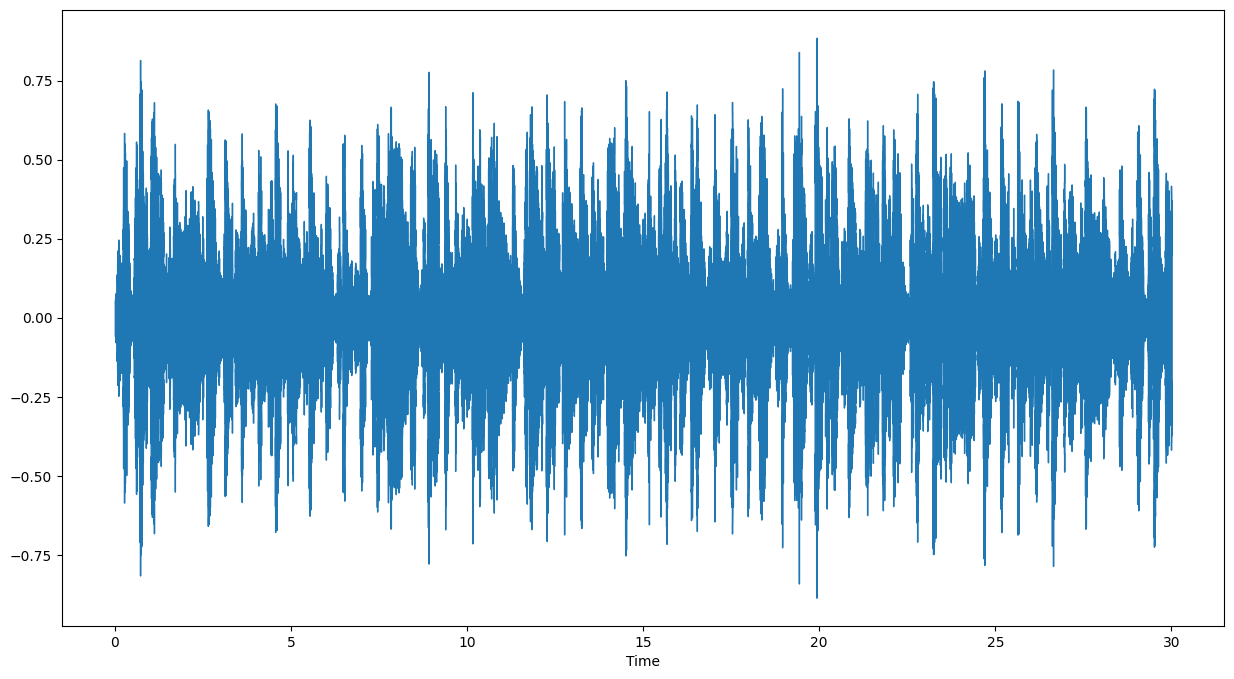

In [118]:
import matplotlib.pyplot as plt
import librosa.display
plt.rcParams["figure.figsize"] = (15,8)
librosa.display.waveshow(x, sr=sr);

### 9.2.2 Transformacja FFT

Większość cech utworów muzycznych  jest ekstrahowana na podstawie analizy spektrum dźwięku i jego zmian. Do konwersji reprezentacji sygnału w dziedzinie czasu do dziedziny czestotliwości wykorzystywana jest szybka transformacja Fouriera.

Utworzymy przebieg będący superpozycją dwóch sinsusoid.

**TODO 9.2.2**
* Popraw poniższy kod, aby narysowany został fragment przebiegu pokazujacy sinusoidę....

(661500,)


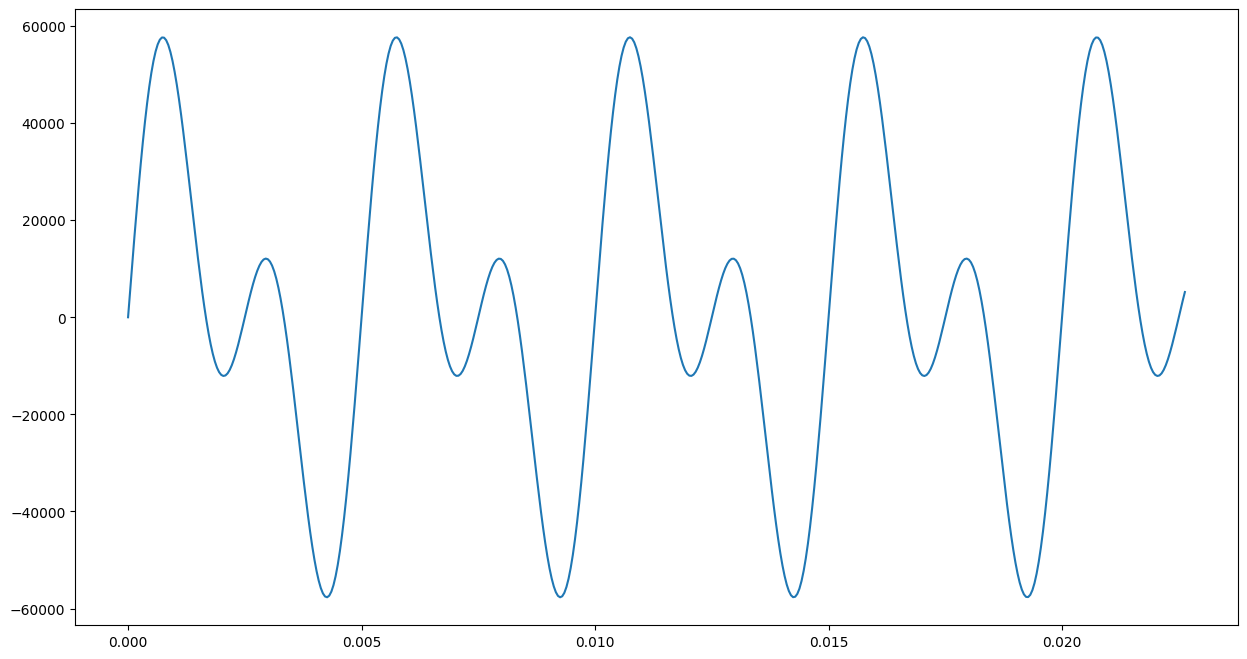

In [119]:
# około 30 sekund przy czasie próbkowania sr
# t=np.linspace(0,30,x.shape[0],endpoint=False)
t=np.linspace(0,30,30*22050,endpoint=False)
print(t.shape)
# sygnał 200 i 400 Hz
signal=np.sin(2*np.pi*200*t) + np.sin(2*np.pi*400*t)
signal=signal*(2**15)
plt.plot(t[0:500],signal[0:500])
plt.show()

Transformacja Fouriera zamienia sygnał w dziedzinie czasu na reprezentację w dziedzinie czestotliwości.

Narysujmy wynik transformacji.

**TODO 9.2.3**
* Co się stanie jeżeli zmniejszymy window_length? Np. do 1 sekundy (22050), trochę mniej niż sekundy (22000), około 93ms (2048)

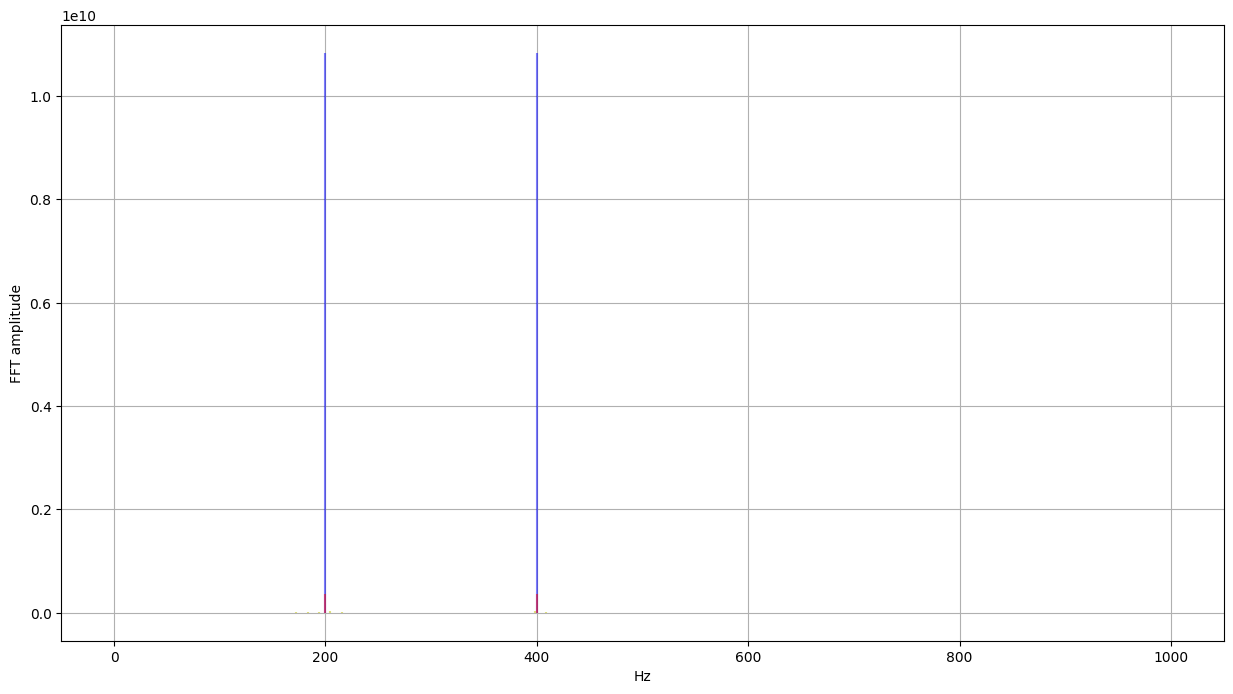

In [120]:
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

def plot_fft(signal,start,window_length,max_freq=11025,sr=22050,color='b',scale=1):
  y=signal[start:start+window_length]
  yf = fft(y)
  xf = fftfreq(window_length, 1 / sr)[:window_length//2]
  limit=xf[xf<=max_freq].shape[0]
  plt.vlines(xf[0:limit], np.zeros(limit),scale*np.abs(yf[0:limit]),colors=color,alpha=0.5)
  plt.grid()
  plt.xlabel('Hz')
  plt.ylabel('FFT amplitude')

# plot_fft(signal,start=0,window_length=signal.shape[0],max_freq=1000)
plot_fft(signal,start=0,window_length=signal.shape[0],max_freq=1000)
plot_fft(signal,start=0,window_length=22050,max_freq=1000,color='r')
plot_fft(signal,start=0,window_length=2048,max_freq=1000,color='y')
plt.show()



**TODO 9.2.4**
* Wydrukuj spektrum sygnału dla 3 punktów w czasie (różniacych się o kilkadziesiąt milisekund), używając róznych kolorów ('r', 'g', 'b'). Ile to będzie kilkadziesiąt milisekund?

Dla różnych momentów czasu rozkład czestotliwości powinien się zmieniać.

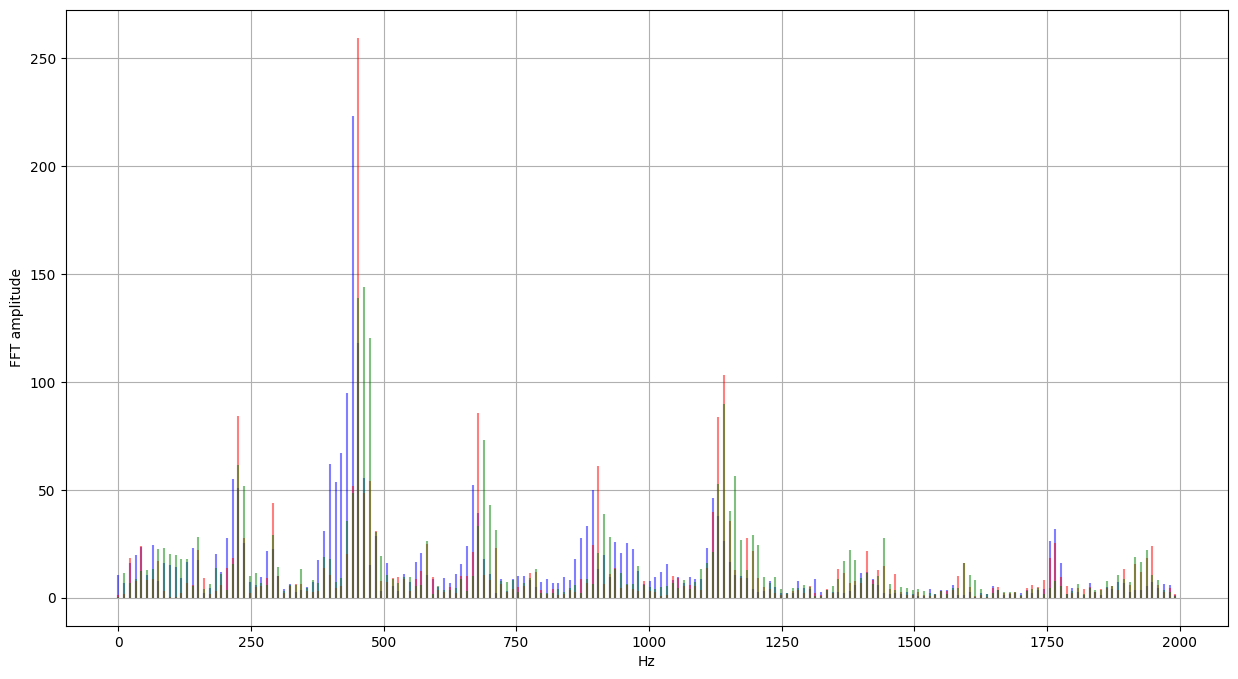

In [121]:
# x = df.audio[df.file=='blues.00000.wav']
# x = df.audio[df.file=='blues.00000.wav'].iloc[0]

# t=np.linspace(0,30,x.shape[0])
# noise=np.sin(2*np.pi*t*200)
# x=x+noise
# noise=np.sin(2*np.pi*t*400)
# x=x+noise

# plot_fft(x,4*22050,22050,1000,'b')
# # plot_fft(x,4*22050+2205,800,1000,'y',scale=1)
# plt.plot(t[0:500],noise[0:500])
# plt.show()

# print(type(x))
# for k in x:
#   print(k)
# plot_fft(x,200,2048,22050)
# print(x.iloc[0])
x = df.audio[df.file=='blues.00000.wav'].iloc[0]
start_point = 22050 # 1 second
offset1 = 1103 # approx 50ms
offset2 = 2206 # approx 100ms
plot_fft(x,start= start_point,window_length=2048,max_freq=2000,color='b')
plot_fft(x,start=start_point + offset1,window_length=2048,max_freq=2000,color='r')
plot_fft(x,start=start_point + offset2,window_length=2048,max_freq=2000,color='g')




### 9.2.3 Spektrogram

Funkcja stft zwraca reprezentację signał w dziedzinie czasu i czestotliwości poprzez wyznaczanie transformacji Fouriera dla kolejnych okien (mogą się nakładać) .

Cytując:




This function returns a complex-valued matrix D such that

* np.abs(D[f, t]) is the magnitude of frequency bin f at frame t, and

* np.angle(D[f, t]) is the phase of frequency bin f at frame t.

(1025, 1293)


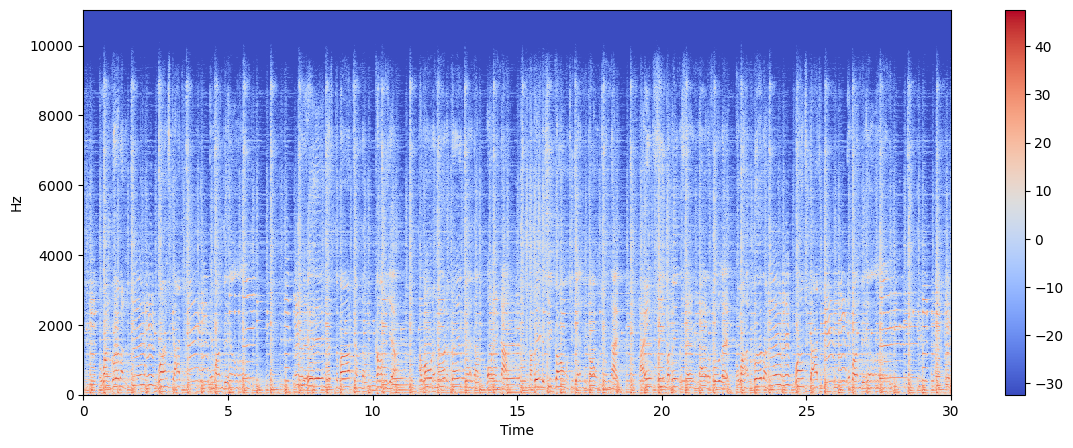

In [122]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
print(X.shape)

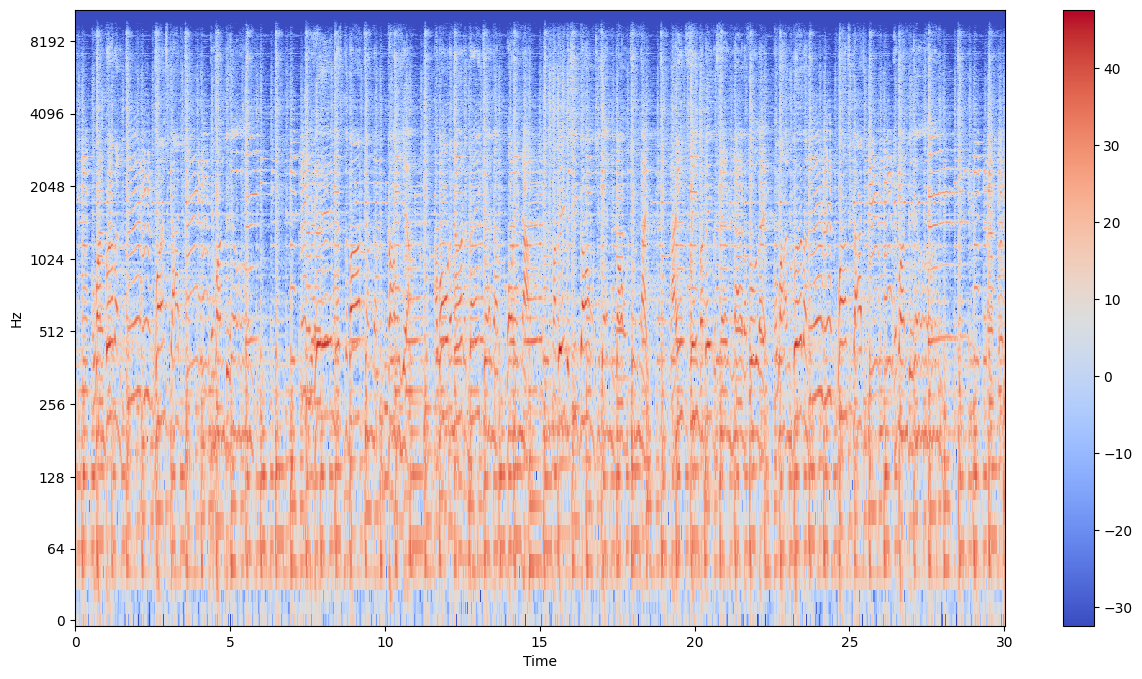

In [123]:
# zmiana na logarytmy
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

Analiza rozmiarów spektrogramu. Ma on 1293 kolumny. Czyli 1293 razy wykonano transformację FFT.

**TODO 9.2.5**
* Oblicz przesunięcie pomiędzy oknami

In [124]:
# Skok pomiedzy oknami FFT (hop_length)
n_fft = (X.shape[0]-1)*2 # X was defined in the cell above TODO 9.2.5
hop_length = n_fft // 4
print(f'Skok pomiędzy oknami:{hop_length * sr/sr} (tak naprawdę 512)')


Skok pomiędzy oknami:512.0 (tak naprawdę 512)


**TODO 9.2.6**

Narysuj diagram częstotliwości dla czasu t=5sec.

* częstość próbkowania sr=22050
* standardowa wielkośc przesunięcia okna dla funkcji stft  512
* która to będzie kolumna?

(1025, 1293)
(1025,)


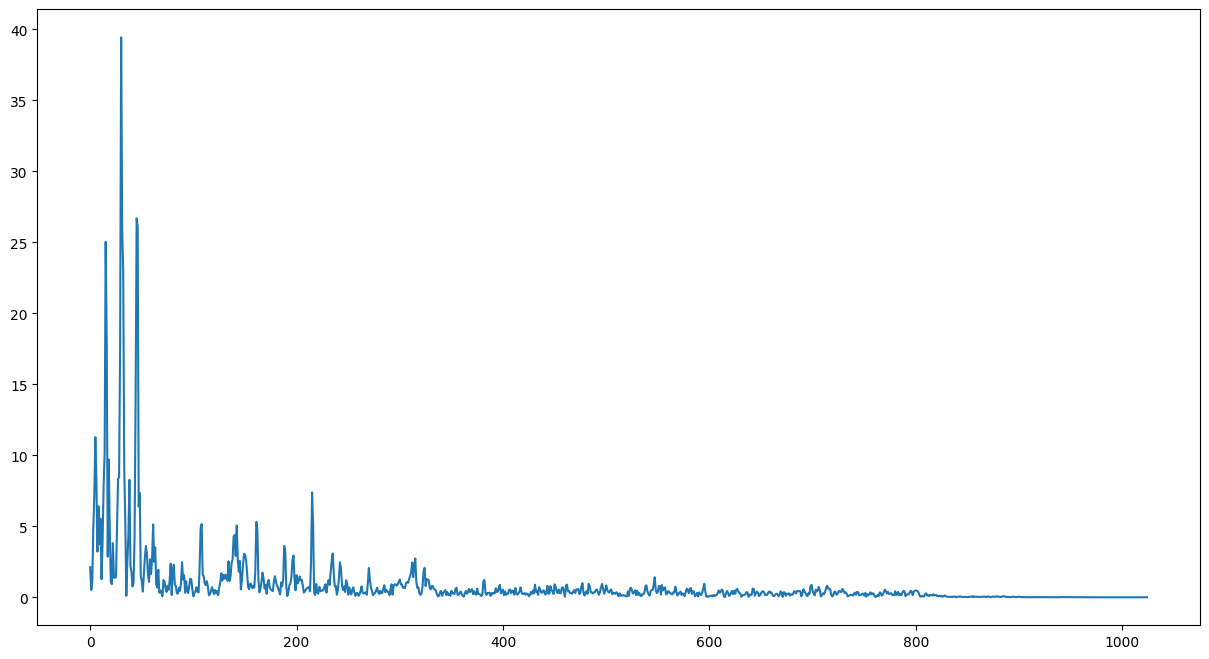

In [125]:
X = librosa.stft(x)
print(X.shape)
hop_length = 512 # Standard hop_length for sr=22050 and default n_fft=2048
col = int(round(5 * sr / hop_length))
amp = X[:,col]

amp=np.abs(amp)
print(amp.shape)

plt.plot(np.arange(amp.shape[0]),amp)
plt.show()


## 9.3. Wyznaczanie cech

Dla każdego nagrania wyznaczymy następujące cechy:
* Zero crossing rate
* Spectral centroid
* RMS
* MEL Frequency Cepstral Coefficients
* Chroma frequenices
* Tempo

Cechy te zostaną dodane jako kolumny do DataFrame. Wyznaczone zostaną wartości średnie i wariancje (w większości przypadków)


### 9.3.1 Zero crossing rate

Ile razy wykres przechodzi przez zero? Zwykle ma większe wartości dla utworów z dominującą perkusją.

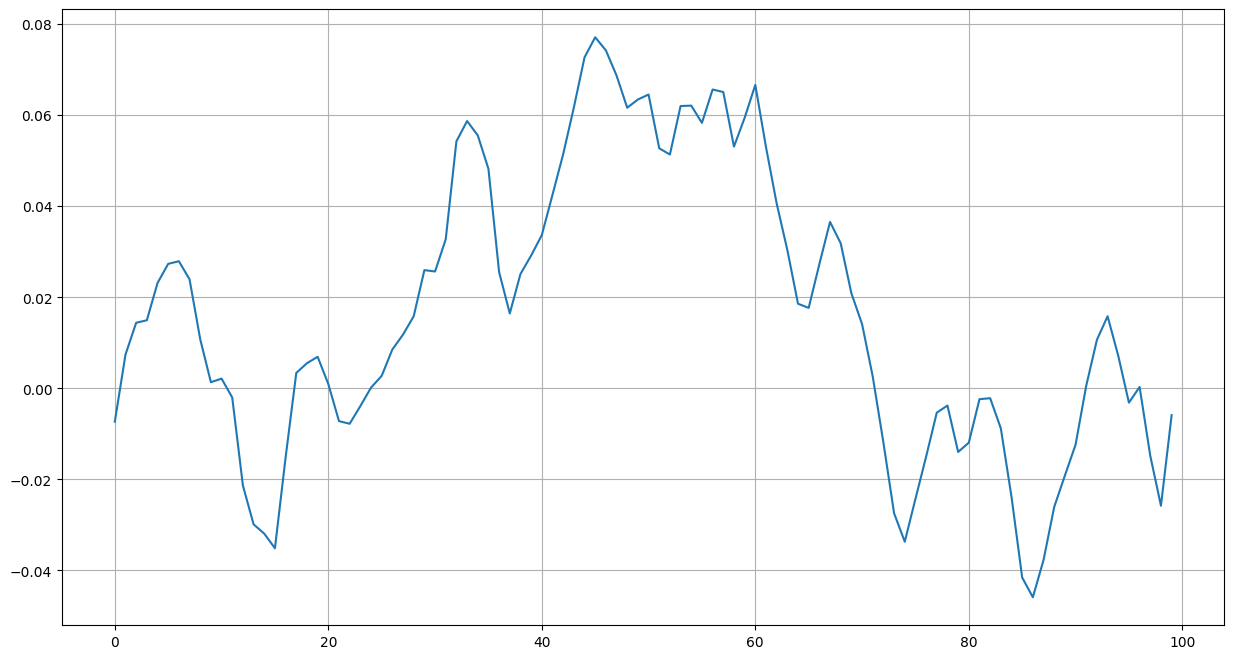

In [126]:
plt.plot(x[300:400])
plt.grid()

In [127]:
zero_crossings = librosa.zero_crossings(x[300:400], pad=False)
print(zero_crossings)
print(sum(zero_crossings))

[False  True False False False False False False False False False  True
 False False False False False  True False False False  True False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False  True False False False  True
  True  True False False]
10


Napiszemy funkcję, która pełny wektor sygnału podziel na pewną liczbę fragmentów (```n_splits ```), obliczy dla każdego z nich wartości cech, a następnie wyznaczy wartość średnią i odchylenie standardowe.


In [128]:
def calculate_stats(x,compute_feature,n_splits):
  delta = x.shape[0]//n_splits
  ys = np.zeros(n_splits)
  for i in range(n_splits):
    if i<n_splits-1:
      y = compute_feature(x[i*delta:(i+1)*delta])
    else:
      y = compute_feature(x[i*delta:])
    ys[i]=y
  # print(ys)
  return ys.mean(),ys.std()

# print(x)
# x to jedna z wczesniej załadowanych tablic sygnału
calculate_stats(x,lambda z:librosa.zero_crossings(z, pad=False).sum()/z.shape[0],10)



(0.08315264585719913, 0.010770225989245166)

Do funkcji ```calculate_stats``` przekazujemy obiekt funkcyjny ```compute_feature``` odpowiedzialny za obliczanie cechy. Może to być wyrażenie lambda.

* Tworzymy listę wartości średnich i odchyleń standardowych dla wszystkich plików
* Zamieniamy na ```ndarray```
* Dodajemy do DataFrame

**TODO 9.3.1**
Dodaj wariancję, czyli kwadrat std

In [129]:
z = [calculate_stats(x, lambda x_segment: librosa.zero_crossings(x_segment, pad=False).sum()/x_segment.shape[0] ,10) for x in df.audio]
z=np.array(z)
print(z.shape)
df['zero_crossing_rate_mean']=z[:,0]
df['zero_crossing_rate_var']=z[:,1]**2
df.head()

(100, 2)


genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  
0  22050                 0.173009                0.000183  
1  22050                 0.121429                0.000809  
2  22050                 0.067792                0.000460  
3  22050                 0.082446                0.000326  
4  22050                 0.106894                0.000775

In [130]:
print(df.shape)
# powinno być (100,6)

(100, 6)


### 9.3.2 Spectral centroid

Cecha reprezentuje ważoną średnią częstotliwości obecnych w dźwieku. Wagą jest amplituda dla danej czestości.

In [131]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape


(1293,)

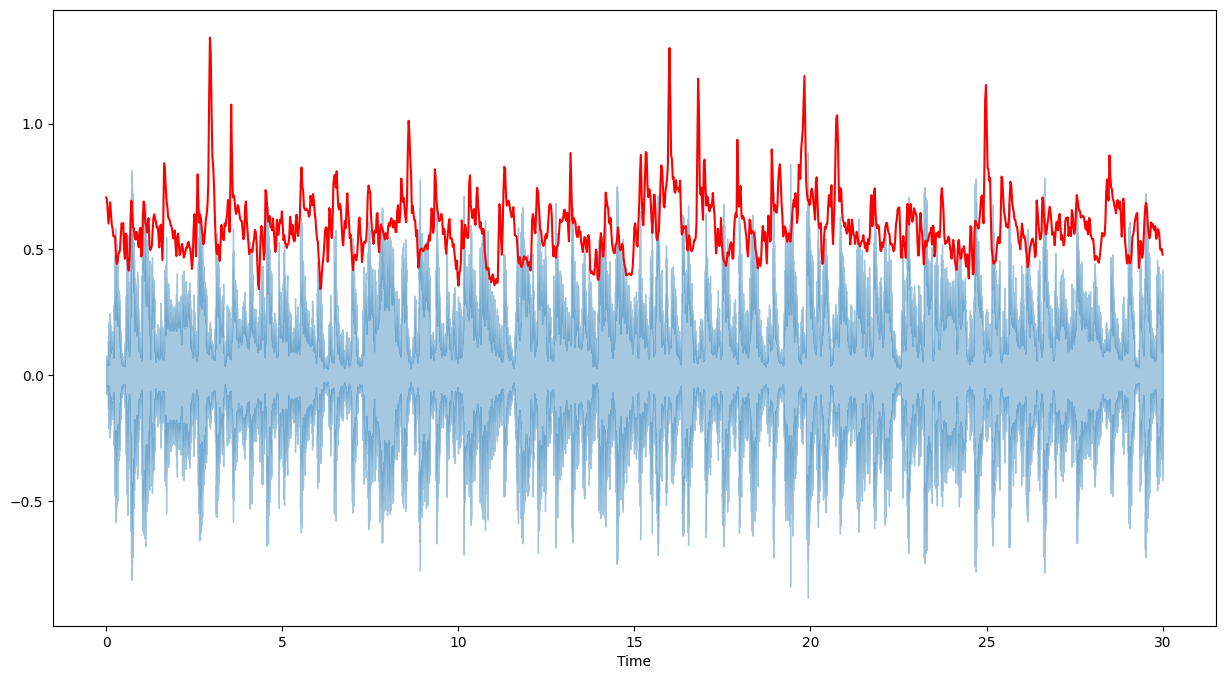

In [132]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
spectral_centroids = spectral_centroids/(spectral_centroids.max()-spectral_centroids.min())
plt.plot(t, spectral_centroids, color='r');


Jak widać wartości zmieniają się w czasie. Policzymy średnie wartości i wariancje dla każdego utworu. Użyta funkcja calculate_stats standardowo dzieli utwór na 10 fragmentów.

**TODO 9.3.2**
* Dodaj do DataFrame kolumny 'spectral_centroid_mean' i 'spectral_centroid_var'

In [133]:
z = [calculate_stats(x,lambda z_seg:librosa.feature.spectral_centroid(y=z_seg, sr=sr)[0].mean(),10) for x in df.audio]
z = np.array(z)
df['spectral_centroid_mean']=z[:,0]
df['spectral_centroid_var']=z[:,1]**2
df.head()

genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.173009                0.000183   
1  22050                 0.121429                0.000809   
2  22050                 0.067792                0.000460   
3  22050                 0.082446                0.000326   
4  22050                 0.106894                0.000775   

   spectral_centroid_mean  spectral_centroid_var  
0             3277.906451           54770.532795  
1             2881.553880           57341.548073  
2             2122.341311           93142.823642  
3             1966.993066          234781.862272  
4             2289.615573          115897.944730

In [134]:
# Powinno być (100,8)
df.shape

(100, 8)

### 9.3.3.RMS
RMS (root mean square) to pierwiastek ze średniej kwadratów. Może zostać obliczony bezpośrednio z sygnału lub jego spektrogramu.

**TODO 9.3.3**
* Analogicznie jak w poprzednich punktach oblicz listę wartości wołając ```calculate_stats``` dla wszystkich ścieżek audio
* Dodaj kolumny 'rms_mean' i 'rms_var'

In [135]:
z = [calculate_stats(x, lambda segment: librosa.feature.rms(y=segment).mean(),10) for x in df.audio]
z = np.array(z)
df['rms_mean']=z[:,0]
df['rms_var']=z[:,1]**2
df.head()

genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.173009                0.000183   
1  22050                 0.121429                0.000809   
2  22050                 0.067792                0.000460   
3  22050                 0.082446                0.000326   
4  22050                 0.106894                0.000775   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  
0             3277.906451           54770.532795  0.158757  0.001316  
1             2881.553880           57341.548073  0.194363  0.000131  
2             2122.341311           93142.823642  0.093439  0.000634  
3             1966.993066          234781.862272  0.083830  0.000438  
4             2289.615573          115897.944730  0.138784  0.004614

In [136]:
# Powinno być (100,10)
df.shape

(100, 10)

### 9.3.4 Spectral Rolloff

Cytując:
 *It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.*



(1293,)


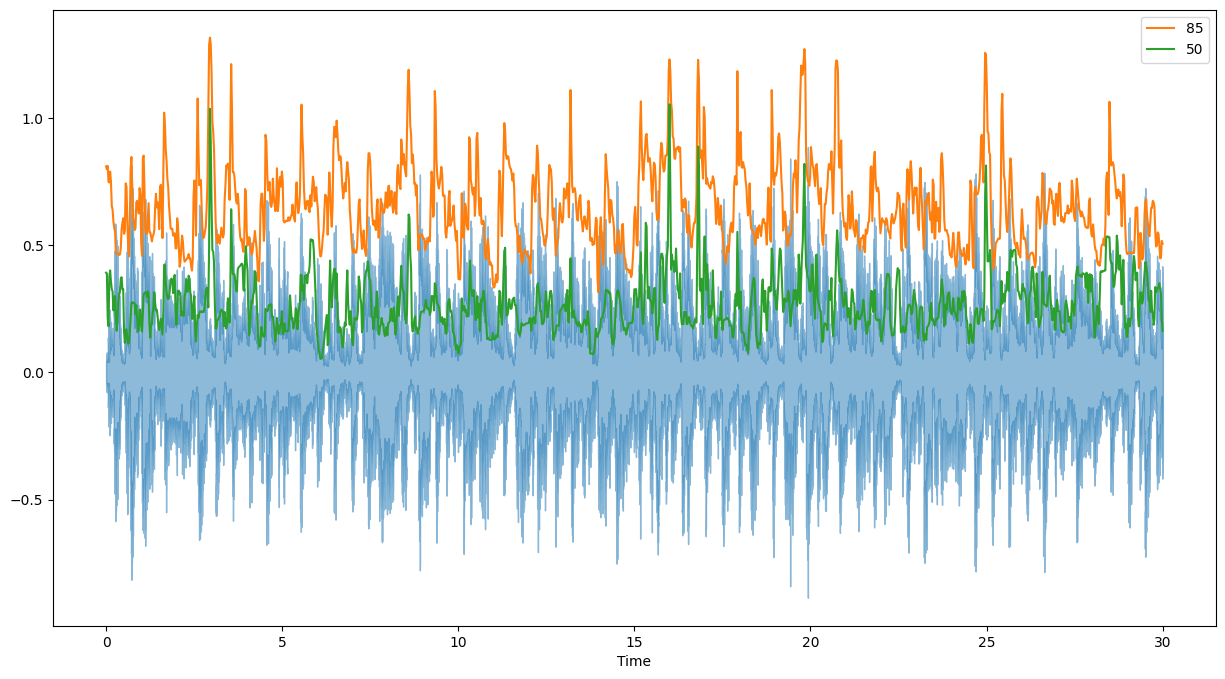

In [137]:
spectral_rolloff85 = librosa.feature.spectral_rolloff(y=x, sr=sr,roll_percent=0.85)[0]
print(spectral_rolloff85.shape)
frames = range(spectral_rolloff85.shape[0])
t = librosa.frames_to_time(frames)

librosa.display.waveshow(x, sr=sr, alpha=0.5)
plt.plot(t, spectral_rolloff85/(spectral_rolloff85.max()-spectral_rolloff85.min()),label='85')
spectral_rolloff50 = librosa.feature.spectral_rolloff(y=x, sr=sr,roll_percent=0.50)[0]
plt.plot(t, spectral_rolloff50/(spectral_rolloff50.max()-spectral_rolloff50.min()),label='50')
plt.legend()
plt.show()


**TODO 9.3.4**
Analogicznie, jak w w punktach 3.1, 3.2 i 3.3. dodajemy cechy do df
* wołamy calculate_stats dla wszystkich plików przekazując funkcję obliczającą spectral_rolloff (ustawiamy sr=sr, roll_percent=0.85)
* Dodajemy kolumny 'spectral_rolloff_mean' i 'spectral_rolloff_var'


In [138]:
z = [calculate_stats(x,lambda segment: librosa.feature.spectral_rolloff(y=segment, sr=sr, roll_percent=0.85)[0].mean(),10) for x in df.audio]
z = np.array(z)
df['spectral_rolloff_mean']=z[:,0]
df['spectral_rolloff_var']=z[:,1]**2
df.head()

genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.173009                0.000183   
1  22050                 0.121429                0.000809   
2  22050                 0.067792                0.000460   
3  22050                 0.082446                0.000326   
4  22050                 0.106894                0.000775   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  \
0             3277.906451           54770.532795  0.158757  0.001316   
1             2881.553880           57341.548073  0.194363  0.000131   
2             2122.341311           93142.823642  0.093439  0.000634   
3             1966.993066          234781.862272  0.083830  0.000438   
4             2289.615573          115897.944730  0.138784  0.004614   

   spectral_rolloff_mean  spectral_rolloff_var  
0            6948.847468          2.003327e+05  
1            6418.807674          9.503773e+04  
2            4971.917218          5.399745e+05  
3            4125.496695          1.255609e+06  
4            4741.661020          5.265932e+05

In [139]:
# Powinno być (100,12)
df.shape

(100, 12)

### 9.3.5 Mel Frequency Cepstral Coefficients

Cechy te powiązane są z nieliniową wrażliwością na słyszane częstotliwości. Patrz: [szybkie wprowadzenie na medium.com](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd)

Standardowo oblicza się 20 cech...

(20, 1293)


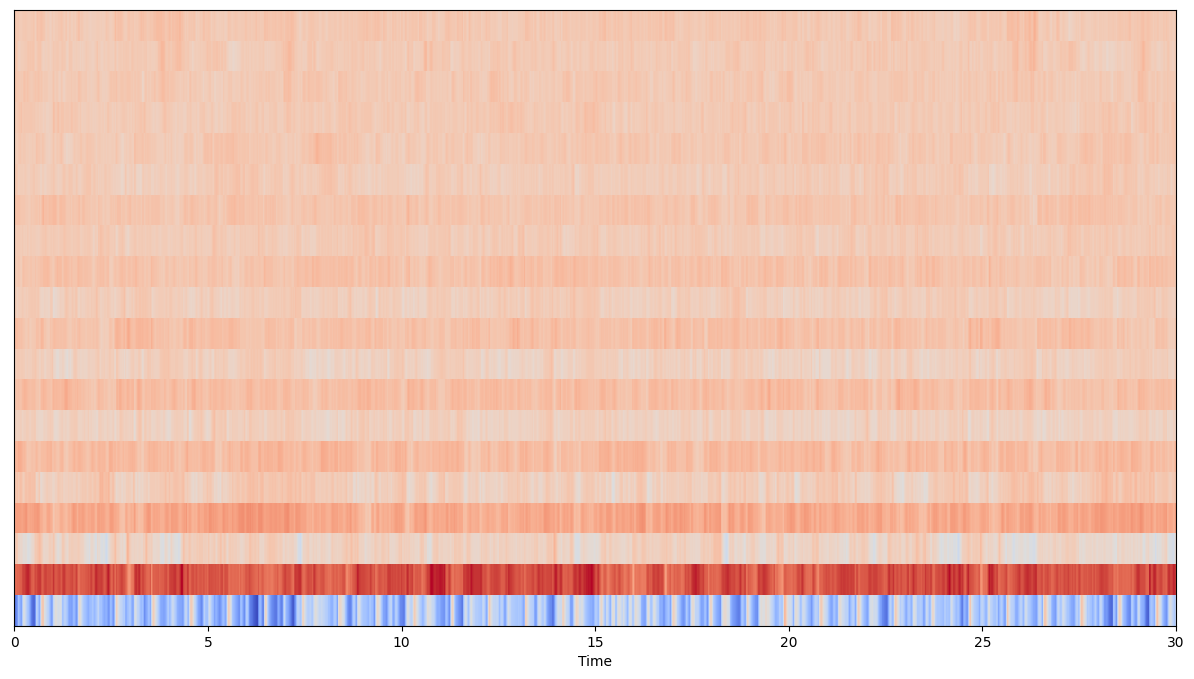

In [140]:
mfc = librosa.feature.mfcc(y=x, sr=sr)
print(mfc.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfc, sr=sr, x_axis='time');

In [141]:
# wartości średnie i wariancje cech
print(mfc.mean(axis=1))
print(mfc.std(axis=1)**2)



[-113.59882    121.57067    -19.162262    42.36394     -6.362266
   18.621931   -13.699734    15.339802   -12.274304    10.970944
   -8.326061     8.802088    -3.6699414    5.7446756   -5.162783
    0.7517066   -1.6878542   -0.4087299   -2.3026767    1.2224671]
[2569.3691    295.8471    235.58446   151.03873   167.99289    89.172424
   67.60309    69.001495   82.21985    63.346542   61.76499    51.28075
   41.2159     40.517525   49.784233   52.424538   36.535862   41.60317
   55.053654   46.94135 ]


Czyli dla każdego utworu otrzymamy dwudziestoelementowe wektrory średnich i wariancji. Utworzymy 2 * 20 kolumn DataFrame - mfcc01_mean ... mfcc20_mean i mfcc01_var ... mfcc20_var

In [142]:
# przetwarzamy wszystkie cechy
def get_stats(mfc):
  return mfc.mean(axis=1),mfc.std(axis=1)**2

mfcs = [get_stats(librosa.feature.mfcc(y=x, sr=sr)) for x in df.audio]



Tworzymy słownik, którego kluczami są nazwy cech, a wartościami - listy zawierające elementy wyznaczone dla kolejnych utworów

**TODO 9.3.5**
* Dodaj zawartość słownika jako kolumny do DataFrame, np. wykonując: ```df[klucz]=pd.Series(wartość)```

In [143]:
dict = {}
for i in range(mfcs[0][0].shape[0]):
  dict[f'mfcc{i+1:02}_mean']=[]
  dict[f'mfcc{i+1:02}_var']=[]
for k in range(len(mfcs)):
  for i in range(mfcs[k][0].shape[0]):
    dict[f'mfcc{i+1:02}_mean'].append(mfcs[k][0][i])
  for i in range(mfcs[k][1].shape[0]):
    dict[f'mfcc{i+1:02}_var'].append(mfcs[k][1][i])

# print(dict)

for k in dict:
  df[k]=pd.Series(dict[k])
df.head()

genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.173009                0.000183   
1  22050                 0.121429                0.000809   
2  22050                 0.067792                0.000460   
3  22050                 0.082446                0.000326   
4  22050                 0.106894                0.000775   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  ...  \
0             3277.906451           54770.532795  0.158757  0.001316  ...   
1             2881.553880           57341.548073  0.194363  0.000131  ...   
2             2122.341311           93142.823642  0.093439  0.000634  ...   
3             1966.993066          234781.862272  0.083830  0.000438  ...   
4             2289.615573          115897.944730  0.138784  0.004614  ...   

   mfcc16_mean  mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
0    -1.256712   43.495701    -2.530688   49.597439     0.574117   59.891350   
1    -0.839078   42.368778    -1.249049   60.606155    -2.334012   53.434162   
2    -3.545286   37.400963    -2.811630   33.870441    -5.767944   38.795231   
3     2.055172  201.671036     4.548859  213.818497     1.223783  130.658722   
4    -4.377610   41.954468    -3.306509   47.447052    -5.423160   47.289337   

   mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
0     1.574703   62.375114    -1.718845   60.837036  
1     3.812872   54.530560     0.295283   89.096581  
2    -5.212289   58.174038    -0.092132   49.961609  
3    -1.646392  139.946060    -3.715831  175.529602  
4    -0.566230   45.013710    -2.170610   45.478962  

[5 rows x 52 columns]

In [144]:
# Powinno być (100,52)
df.shape

(100, 52)

### 9.3.6 Częstości chromatyczne (Chroma Frequencies )

Reprezentują rozkład w widmie poszczególnych półtonów, np. A: 440HZ,880Hz, 1760Hz, itd.

Jest ich w sumie 12: C, C#, D, D#, E, F, F#, G, G#, A, A#, B

(12, 1293)


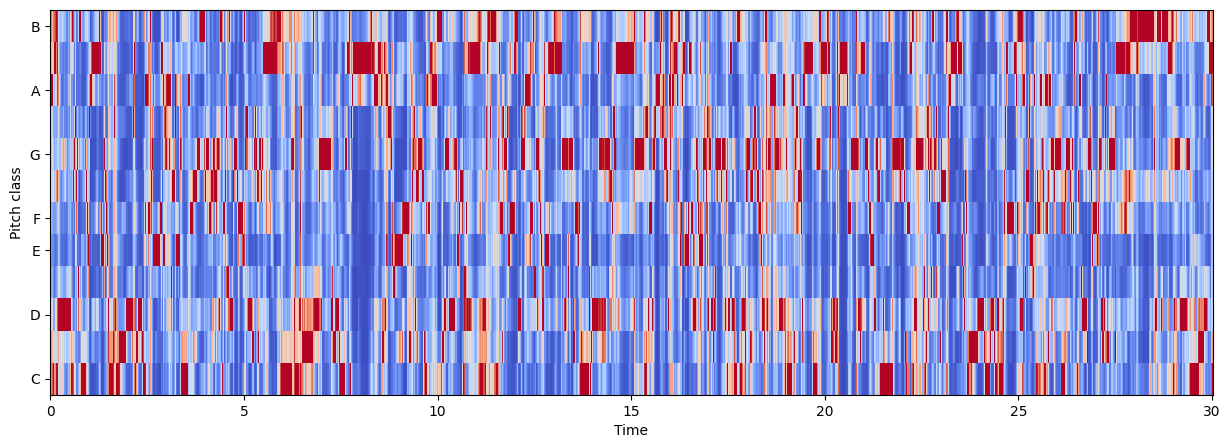

In [145]:
hop_length=512 #skok pomiędzy oknami
chroma = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
print(chroma.shape)

Sytuacja jest podobna do MFCC. Dla każdego utworu otrzymujemy tablicę z 12 wierszami (odpowiadającymi półtonom) i kolumnami odpowidajacymi oknom.

**TODO 9.3.6**
* Dodaj kolumny chroma01_mean, chroma_01_var ... chroma12_mean, chroma_12_var do DataFrame

In [146]:
chromas = [get_stats(librosa.feature.chroma_stft(y=x, sr=sr)) for x in df.audio]

dict = {}
for i in range(chromas[0][0].shape[0]):
  dict[f'chroma{i+1:02}_mean']=[]
  dict[f'chroma{i+1:02}_var']=[]
for k in range(len(chromas)):
  for i in range(chromas[k][0].shape[0]):
    dict[f'chroma{i+1:02}_mean'].append(chromas[k][0][i])
  for i in range(chromas[k][1].shape[0]):
    dict[f'chroma{i+1:02}_var'].append(chromas[k][1][i])

print(dict)

for k in dict:
  df[k]=pd.Series(dict[k])
df.head()

{'chroma01_mean': [0.41164145, 0.36861572, 0.5529875, 0.18295932, 0.26229402, 0.38014767, 0.38352704, 0.4467493, 0.37302968, 0.47582218, 0.5583585, 0.5081092, 0.3994632, 0.37112898, 0.53174067, 0.4293007, 0.35933948, 0.5873929, 0.34603387, 0.52361494, 0.42070308, 0.5565849, 0.296424, 0.4608182, 0.43320763, 0.45097056, 0.31980315, 0.6607909, 0.39817706, 0.31772602, 0.24824716, 0.31967524, 0.42551333, 0.25935704, 0.23832265, 0.1926048, 0.3622428, 0.4600403, 0.34137163, 0.27290025, 0.3597521, 0.5174865, 0.39132944, 0.25260174, 0.3842359, 0.31111133, 0.41249344, 0.33860192, 0.35418242, 0.46734732, 0.47982314, 0.33005592, 0.1891853, 0.58698136, 0.32666087, 0.31518847, 0.16392998, 0.12448587, 0.197339, 0.33399972, 0.63556135, 0.3621669, 0.32089478, 0.40850207, 0.3433648, 0.50704503, 0.3753867, 0.29498082, 0.54499733, 0.3604298, 0.6223043, 0.39989918, 0.5714957, 0.39225033, 0.37549043, 0.49321443, 0.43487054, 0.40285307, 0.42536485, 0.38821185, 0.28090787, 0.31558183, 0.30632702, 0.26329675, 

genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.173009                0.000183   
1  22050                 0.121429                0.000809   
2  22050                 0.067792                0.000460   
3  22050                 0.082446                0.000326   
4  22050                 0.106894                0.000775   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  ...  \
0             3277.906451           54770.532795  0.158757  0.001316  ...   
1             2881.553880           57341.548073  0.194363  0.000131  ...   
2             2122.341311           93142.823642  0.093439  0.000634  ...   
3             1966.993066          234781.862272  0.083830  0.000438  ...   
4             2289.615573          115897.944730  0.138784  0.004614  ...   

   chroma08_mean  chroma08_var  chroma09_mean  chroma09_var  chroma10_mean  \
0       0.409774      0.061161       0.432496      0.076523       0.467302   
1       0.342711      0.071374       0.528670      0.115275       0.371443   
2       0.612479      0.107288       0.379378      0.051610       0.275655   
3       0.202401      0.079426       0.212197      0.046125       0.497635   
4       0.319973      0.060981       0.308652      0.103753       0.240659   

   chroma10_var  chroma11_mean  chroma11_var  chroma12_mean  chroma12_var  
0      0.082432       0.512999      0.077406       0.504783      0.091596  
1      0.055734       0.338009      0.069693       0.299936      0.055547  
2      0.074707       0.260258      0.046810       0.429357      0.075127  
3      0.160494       0.333104      0.095903       0.205504      0.073221  
4      0.050090       0.381880      0.071970       0.439754      0.103346  

[5 rows x 76 columns]

In [147]:
for k in dict:
  df[k]=pd.Series(dict[k])
df.head()

genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.173009                0.000183   
1  22050                 0.121429                0.000809   
2  22050                 0.067792                0.000460   
3  22050                 0.082446                0.000326   
4  22050                 0.106894                0.000775   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  ...  \
0             3277.906451           54770.532795  0.158757  0.001316  ...   
1             2881.553880           57341.548073  0.194363  0.000131  ...   
2             2122.341311           93142.823642  0.093439  0.000634  ...   
3             1966.993066          234781.862272  0.083830  0.000438  ...   
4             2289.615573          115897.944730  0.138784  0.004614  ...   

   chroma08_mean  chroma08_var  chroma09_mean  chroma09_var  chroma10_mean  \
0       0.409774      0.061161       0.432496      0.076523       0.467302   
1       0.342711      0.071374       0.528670      0.115275       0.371443   
2       0.612479      0.107288       0.379378      0.051610       0.275655   
3       0.202401      0.079426       0.212197      0.046125       0.497635   
4       0.319973      0.060981       0.308652      0.103753       0.240659   

   chroma10_var  chroma11_mean  chroma11_var  chroma12_mean  chroma12_var  
0      0.082432       0.512999      0.077406       0.504783      0.091596  
1      0.055734       0.338009      0.069693       0.299936      0.055547  
2      0.074707       0.260258      0.046810       0.429357      0.075127  
3      0.160494       0.333104      0.095903       0.205504      0.073221  
4      0.050090       0.381880      0.071970       0.439754      0.103346  

[5 rows x 76 columns]

In [148]:
# Powinno być (100,76)
df.shape

(100, 76)

### 9.3.7 Tempo utworu

Tempo utworu jest mierzone w [BPM (beats per minute)](https://en.wikipedia.org/wiki/Tempo) - czyli liczbie taktów na minutę. Okreslanie tempa opiera się na wykrywaniu  [początków nut (ang. onset detection)](https://en.wikipedia.org/wiki/Onset_(audio)), a następnie próbie dopasowania do nich tempa. [Więcej informacji](https://www.ee.columbia.edu/~dpwe/e4896/lectures/E4896-L10.pdf)

In [149]:
# Można to zrobić w jednym kroku przyjmujące standardowe wartości
x = df.audio[df.file=='blues.00000.wav'].iloc[0]
tempo = librosa.feature.rhythm.tempo(y=x)
print(tempo)

[123.046875]


In [150]:
# lub dostroić parametry
hop_length = 512 #wielkosć okna
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
tempo = librosa.feature.rhythm.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]
print(tempo)

123.046875


Poniżej kod i ilustracje z dokumentacji librosa. Poziome paski na tempogramie to wielokrotności taktów, ale też półnuty, ćwierćnuty, ósemki, itd.

In [151]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.feature.rhythm.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]

print(tempogram.shape)
print(tempo)



(384, 1293)
123.046875


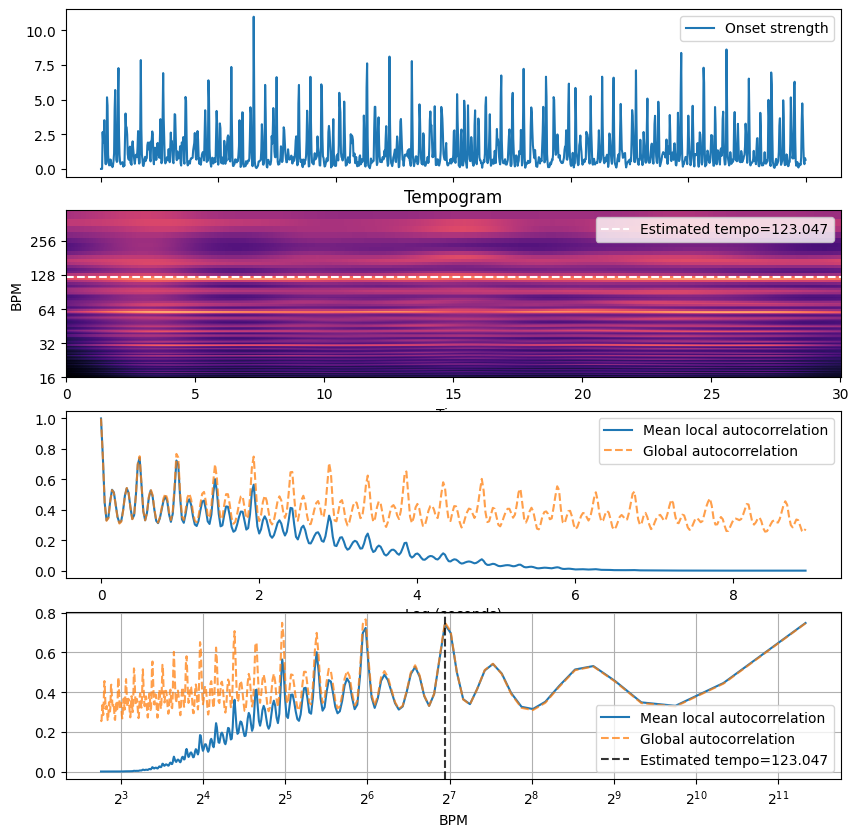

In [152]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', base=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', base=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

**TODO 9.3.7**
1. Utwórz listę wartości tempa dla wszystkich utworów w df.audio
2. Dodaj kolumnę `tempo`

In [153]:
tempos=[librosa.feature.rhythm.tempo(y=x)[0] for x in df.audio]
# get_ipython().run_line_magic('pinfo2', '?? tempos') # This line is for notebook inspection, can be kept or removed
df['tempo'] = tempos
df.head()

genre           file                                              audio  \
0   pop  pop.00009.wav  [-0.056121826, -0.025482178, 0.00076293945, 0....   
1   pop  pop.00008.wav  [0.4713745, 0.42648315, 0.41140747, 0.38739014...   
2   pop  pop.00006.wav  [-0.0340271, -0.043304443, -0.0463562, -0.0431...   
3   pop  pop.00007.wav  [-0.029510498, -0.031829834, -0.023498535, -0....   
4   pop  pop.00005.wav  [0.04498291, 0.045440674, 0.045135498, 0.04403...   

      sr  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  22050                 0.173009                0.000183   
1  22050                 0.121429                0.000809   
2  22050                 0.067792                0.000460   
3  22050                 0.082446                0.000326   
4  22050                 0.106894                0.000775   

   spectral_centroid_mean  spectral_centroid_var  rms_mean   rms_var  ...  \
0             3277.906451           54770.532795  0.158757  0.001316  ...   
1             2881.553880           57341.548073  0.194363  0.000131  ...   
2             2122.341311           93142.823642  0.093439  0.000634  ...   
3             1966.993066          234781.862272  0.083830  0.000438  ...   
4             2289.615573          115897.944730  0.138784  0.004614  ...   

   chroma08_var  chroma09_mean  chroma09_var  chroma10_mean  chroma10_var  \
0      0.061161       0.432496      0.076523       0.467302      0.082432   
1      0.071374       0.528670      0.115275       0.371443      0.055734   
2      0.107288       0.379378      0.051610       0.275655      0.074707   
3      0.079426       0.212197      0.046125       0.497635      0.160494   
4      0.060981       0.308652      0.103753       0.240659      0.050090   

   chroma11_mean  chroma11_var  chroma12_mean  chroma12_var       tempo  
0       0.512999      0.077406       0.504783      0.091596  107.666016  
1       0.338009      0.069693       0.299936      0.055547  172.265625  
2       0.260258      0.046810       0.429357      0.075127   92.285156  
3       0.333104      0.095903       0.205504      0.073221  129.199219  
4       0.381880      0.071970       0.439754      0.103346  112.347147  

[5 rows x 77 columns]

**TODO 9.3.8**

Sprawdź liczbę wierszy i kolumn. Oczekiwany wynik (100,77)

In [155]:
print(df.shape)

(100, 77)


## 4. Zapisz do pliku

**TODO 9.3.9**

Zapisz DataFrame do pliku 'gitzan_small_features.csv' i pobierz plik.




In [156]:
df.to_csv('gitzan_small_features.csv', index=False)
print("DataFrame saved to gitzan_small_features.csv")


DataFrame saved to gitzan_small_features.csv
